C:\Users\yun\AppData\Local\Temp\ipykernel_26544\131227501.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data.values, palette='Set3')
C:\Users\yun\AppData\Local\Temp\ipykernel_26544\131227501.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data.values, palette='Set3')
C:\Users\yun\AppData\Local\Temp\ipykernel_26544\131227501.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data.values, palette='Set3')
C:\Users\yun\AppData\Local\Temp\ipykernel_26544\131227501.py:77: FutureWarning:

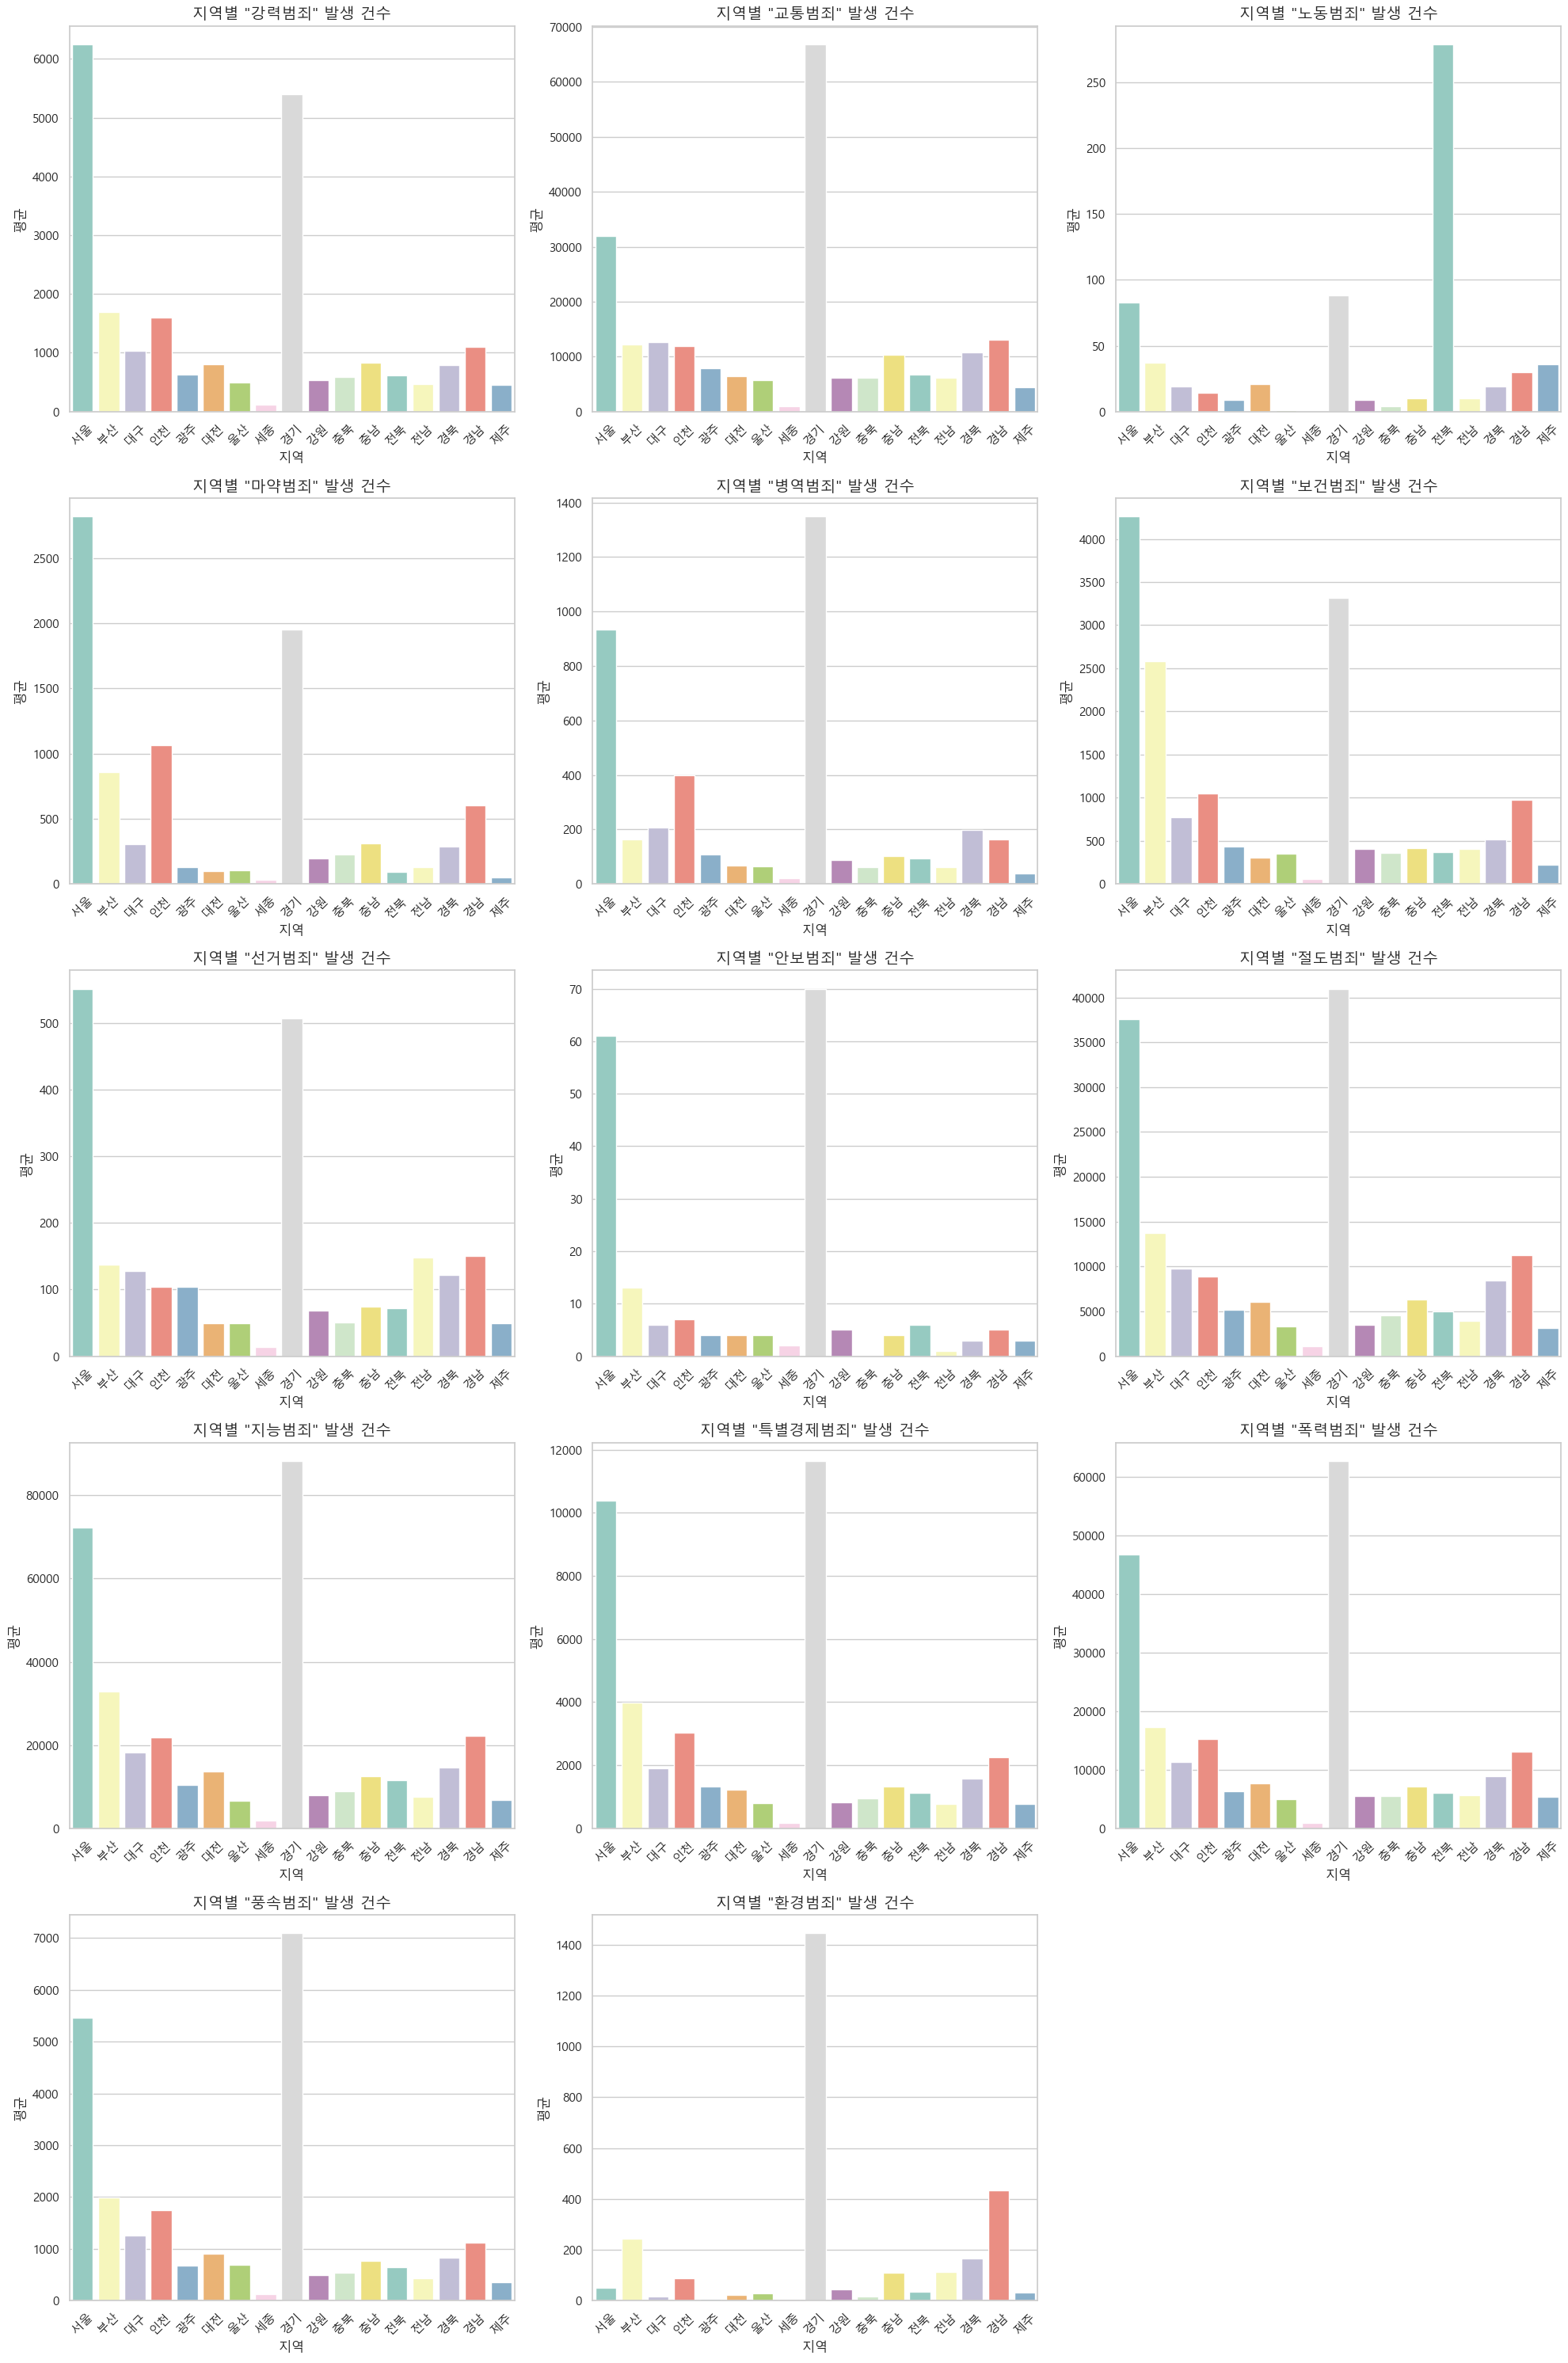

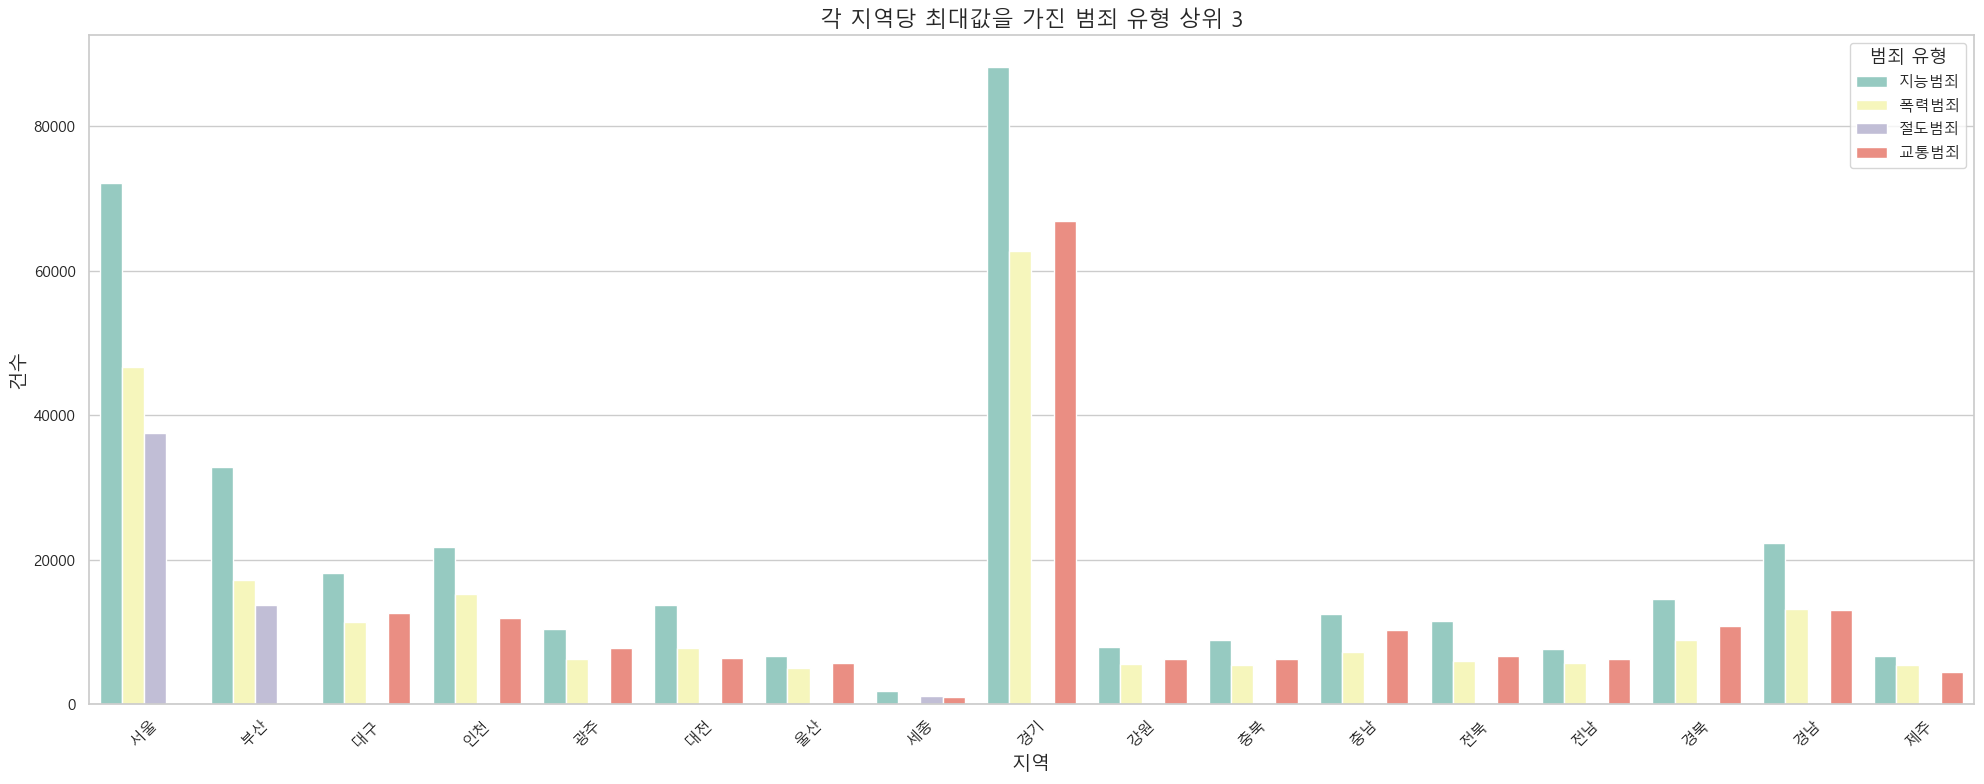

In [268]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

plt.rc('font', family='Malgun Gothic')

file_path = 'data/경찰청_범죄 발생 지역별 통계_20221231.csv'

region = pd.read_csv(file_path, engine='python')

mainCategory = region[region['범죄대분류'] != '기타범죄'].groupby(['범죄대분류'])

#mainCategory.get_group('강력범죄')

crimeTypeList = []
titleList = []

for name, group in mainCategory:
    crime = pd.DataFrame(group.iloc[:, 2:].sum()).T
    crimeTypeList.append(crime)
    titleList.append(name[0])
    
#print(crimeTypeList)
#print(titleList)

def processCrimeData(type):
    gyeonggi = [col for col in type.columns if col.startswith('경기')]
    gangwon = [col for col in type.columns if col.startswith('강원')]
    chungbuk = [col for col in type.columns if col.startswith('충북')]
    chungnam = [col for col in type.columns if col.startswith('충남')]
    jeonbuk = [col for col in type.columns if col.startswith('전북')]
    jeonnam = [col for col in type.columns if col.startswith('전남')]
    gyeongbuk = [col for col in type.columns if col.startswith('경북')]
    gyeongnam = [col for col in type.columns if col.startswith('경남')]
    jeju = [col for col in type.columns if col.startswith('제주')]

    type['경기'] = type[gyeonggi].sum(axis=1)
    type['강원'] = type[gangwon].sum(axis=1)
    type['충북'] = type[chungbuk].sum(axis=1)
    type['충남'] = type[chungnam].sum(axis=1)
    type['전북'] = type[jeonbuk].sum(axis=1)
    type['전남'] = type[jeonnam].sum(axis=1)
    type['경북'] = type[gyeongbuk].sum(axis=1)
    type['경남'] = type[gyeongnam].sum(axis=1)
    type['제주'] = type[jeju].sum(axis=1)

    type.drop(columns=(gyeonggi + gangwon + chungbuk + chungnam + jeonbuk + jeonnam + gyeongbuk + gyeongnam + jeju + ['기타도시'] + ['도시이외']), inplace=True) #열 제거
    #print(gyeonggi)
    #print(type['경기'])
    return type

for i in range(len(crimeTypeList)):
    crimeTypeList[i] = processCrimeData(crimeTypeList[i])

#최대값 3개 찾기
maxCrimeTypeList = []

for i in range(len(crimeTypeList[0].columns)):
    maxTitelList = []
    
    for j in range(len(titleList)):
        currentValue = crimeTypeList[j][crimeTypeList[0].columns[i]].iloc[0]
        maxTitelList.append((currentValue, titleList[j], crimeTypeList[j].columns[i]))
    
    maxTitelList.sort(reverse=True, key=lambda x: x[0])
    
    for maxValue, maxCategory, maxRegion in maxTitelList[:3]:
        maxCrimeTypeList.append((maxValue, maxCategory, maxRegion))

plt.figure(figsize=(20, 30))

#범죄분류별 평균 발생 건수
for i, (crimeData, title) in enumerate(zip(crimeTypeList, titleList), 1):
    plt.subplot(5, 3, i)
    
    data = crimeData.mean()
    sns.barplot(x=data.index, y=data.values, palette='Set3')
    plt.title(f'지역별 "{title}" 발생 건수', fontsize=14)
    plt.xlabel('지역')
    plt.ylabel('평균')
    plt.xticks(rotation=45)

plt.tight_layout()

#최대값 범죄 유형, 지역, 건수
plt.figure(figsize=(20, 8))
ax = sns.barplot(x=[maxRegion for _, _, maxRegion in maxCrimeTypeList],
                 y=[maxValue for maxValue, _, _ in maxCrimeTypeList],
                 hue=[maxCategory for _, maxCategory, _ in maxCrimeTypeList],
                 palette='Set3')

plt.title('각 지역당 최대값을 가진 범죄 유형 상위 3', fontsize=16)
plt.xlabel('지역', fontsize=14)
plt.ylabel('건수', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='범죄 유형', title_fontsize='13', fontsize='11')

plt.tight_layout()
plt.show()

In [209]:
import pandas as pd
import folium

wmsUrl = ('https://geo.safemap.go.kr/geoserver/safemap/wms')

wmsLayer = folium.raster_layers.WmsTileLayer(
    name='범죄주의구간',
    url=wmsUrl,
    apikey='U42BJJFV-U42B-U42B-U42B-U42BJJFVJ1',
    layers='A2SM_CRMNLHSPOT_TOT',
    styles='A2SM_CrmnlHspot_Tot_Tot',
    fmt='image/png',
    transparent=True,
    EXCEPTIONS='text/xml',
    SERVICE='WMS',
    VERSION='1.1.1',
    REQUEST='GetMap',
    SRS='EPSG:900913',
    BBOX='14139627.236972,4525683.569098,14139932.985085,4525989.3172111',
    WIDTH='256',
    HEIGHT='256'
)

file_path = 'data/경찰청_범죄 발생 지역별 통계_20221231.csv'    #22년 통계
filePathJson = 'data/sigungu.json'  #도 좌표
filePathJson2 = 'data/cities.json'  #시/군/구 좌표 (시청 기준)

region = pd.read_csv(file_path, engine='python')
coordinate = pd.read_json(filePathJson)
coordinateMore = pd.read_json(filePathJson2)
#print(coordinate)
#print(coordinate['서울']['lat'])
#print(coordinate.head())

mainCategory = region[region['범죄대분류'] != '기타범죄'].groupby(['범죄대분류'])

crimeTypeList = []
crimeTypeListMore = []
titleList = []

for name, group in mainCategory:
    crime = pd.DataFrame(group.iloc[:, 2:].sum()).T
    if '기타도시' in crime.columns and '도시이외' in crime.columns:
        crime = crime.drop(columns=['기타도시', '도시이외'])
    crimeTypeList.append(crime.copy())
    crimeTypeListMore.append(crime.copy())
    titleList.append(name[0])

#시/군/구 통합
def processCrimeData(type):
    gyeonggi = [col for col in type.columns if col.startswith('경기')]
    gangwon = [col for col in type.columns if col.startswith('강원')]
    chungbuk = [col for col in type.columns if col.startswith('충북')]
    chungnam = [col for col in type.columns if col.startswith('충남')]
    jeonbuk = [col for col in type.columns if col.startswith('전북')]
    jeonnam = [col for col in type.columns if col.startswith('전남')]
    gyeongbuk = [col for col in type.columns if col.startswith('경북')]
    gyeongnam = [col for col in type.columns if col.startswith('경남')]
    jeju = [col for col in type.columns if col.startswith('제주')]

    type['경기'] = type[gyeonggi].sum(axis=1)
    type['강원'] = type[gangwon].sum(axis=1)
    type['충북'] = type[chungbuk].sum(axis=1)
    type['충남'] = type[chungnam].sum(axis=1)
    type['전북'] = type[jeonbuk].sum(axis=1)
    type['전남'] = type[jeonnam].sum(axis=1)
    type['경북'] = type[gyeongbuk].sum(axis=1)
    type['경남'] = type[gyeongnam].sum(axis=1)
    type['제주'] = type[jeju].sum(axis=1)

    type.drop(columns=(gyeonggi + gangwon + chungbuk + chungnam + jeonbuk + jeonnam + gyeongbuk + gyeongnam + jeju), inplace=True) #열 제거
    #print(gyeonggi)
    #print(type['경기'])
    return type

for i in range(len(crimeTypeList)):
    crimeTypeList[i] = processCrimeData(crimeTypeList[i])

#최대값 3개 찾기
maxCrimeTypeList = []
maxCrimeTypeListMore = []

for i in range(len(crimeTypeList[0].columns)):
    maxTitelList = []
    
    for j in range(len(titleList)):
        currentValue = crimeTypeList[j][crimeTypeList[0].columns[i]].iloc[0]
        maxTitelList.append((currentValue, titleList[j], crimeTypeList[j].columns[i]))
    
    maxTitelList.sort(reverse=True, key=lambda x: x[0])
    
    for maxValue, maxCategory, maxRegion in maxTitelList[:3]:
        maxCrimeTypeList.append((maxValue, maxCategory, maxRegion))

for i in range(len(crimeTypeListMore[0].columns)):
    maxTitelList = []
    
    for j in range(len(titleList)):
        currentValue = crimeTypeListMore[j][crimeTypeListMore[0].columns[i]].iloc[0].mean()
        maxTitelList.append((currentValue, titleList[j], crimeTypeListMore[j].columns[i]))
    
    maxTitelList.sort(reverse=True, key=lambda x: x[0])
    
    for maxValue, maxCategory, maxRegion in maxTitelList[:3]:
        maxCrimeTypeListMore.append((maxValue, maxCategory, maxRegion))

mapCenter = [36.3504, 127.3845]  # 대한민국 중심 위도, 경도
m = folium.Map(location=mapCenter, zoom_start=7)

wmsLayer.add_to(m)

#레이어 도
layer1 = folium.FeatureGroup(name='도 별')
for i in range(len(crimeTypeList[0].columns)):
    location = [coordinate[crimeTypeList[0].columns[i]]['lat'], coordinate[crimeTypeList[0].columns[i]]['lon']]
    popup_html = f"""<h6><strong>{crimeTypeList[0].columns[i]}</h6></strong>"""
    for j in range(len(titleList)):
        popup_html += f"""<span><strong>{titleList[j]}</strong>: {crimeTypeList[j][crimeTypeList[0].columns[i]].sum()} 건</span><br>"""

    maxToolTip = ""
    for maxValue, maxCategory, maxRegion in maxCrimeTypeList:
        if maxRegion == crimeTypeList[0].columns[i]:
            maxToolTip += f"""<span>최대값: {maxValue}, 범죄종류: <strong>{maxCategory}</strong></span><br>"""
    
    toolTip = f"""<strong>{crimeTypeList[0].columns[i]}</strong><br>{maxToolTip}"""
    
    popUp = folium.Popup(popup_html, max_width=450)
    folium.Marker(location=location, popup=popUp, tooltip=toolTip).add_to(layer1)

#레이어 시/군/구
layer2 = folium.FeatureGroup(name='시/군/구 별', show=False)
for i in range(len(crimeTypeListMore[0].columns)):
    location = [coordinateMore[crimeTypeListMore[0].columns[i]]['lat'], coordinateMore[crimeTypeListMore[0].columns[i]]['lon']]
    
    popup_html = f"""<h6><strong>{crimeTypeListMore[0].columns[i]}</strong></h6>"""
    for j in range(len(titleList)):
        popup_html += f"""<span><strong>{titleList[j]}</strong>: {crimeTypeListMore[j][crimeTypeListMore[0].columns[i]].sum()} 건</span><br>"""
    
    maxToolTip = ""
    for maxValue, maxCategory, maxRegion in maxCrimeTypeListMore:
        if maxRegion == crimeTypeListMore[0].columns[i]:
            maxToolTip += f"""<span>최대값: {maxValue}, 범죄종류: <strong>{maxCategory}</strong></span><br>"""
    
    toolTip = f"""<strong>{crimeTypeListMore[0].columns[i]}</strong><br>{maxToolTip}"""
    
    popUp = folium.Popup(popup_html, max_width=450)
    folium.Marker(location=location, popup=popUp, tooltip=toolTip).add_to(layer2)

m.add_child(layer1)
m.add_child(layer2)

# LayerControl 추가
layerControl = folium.LayerControl(collapsed=False)
m.add_child(layerControl)

m

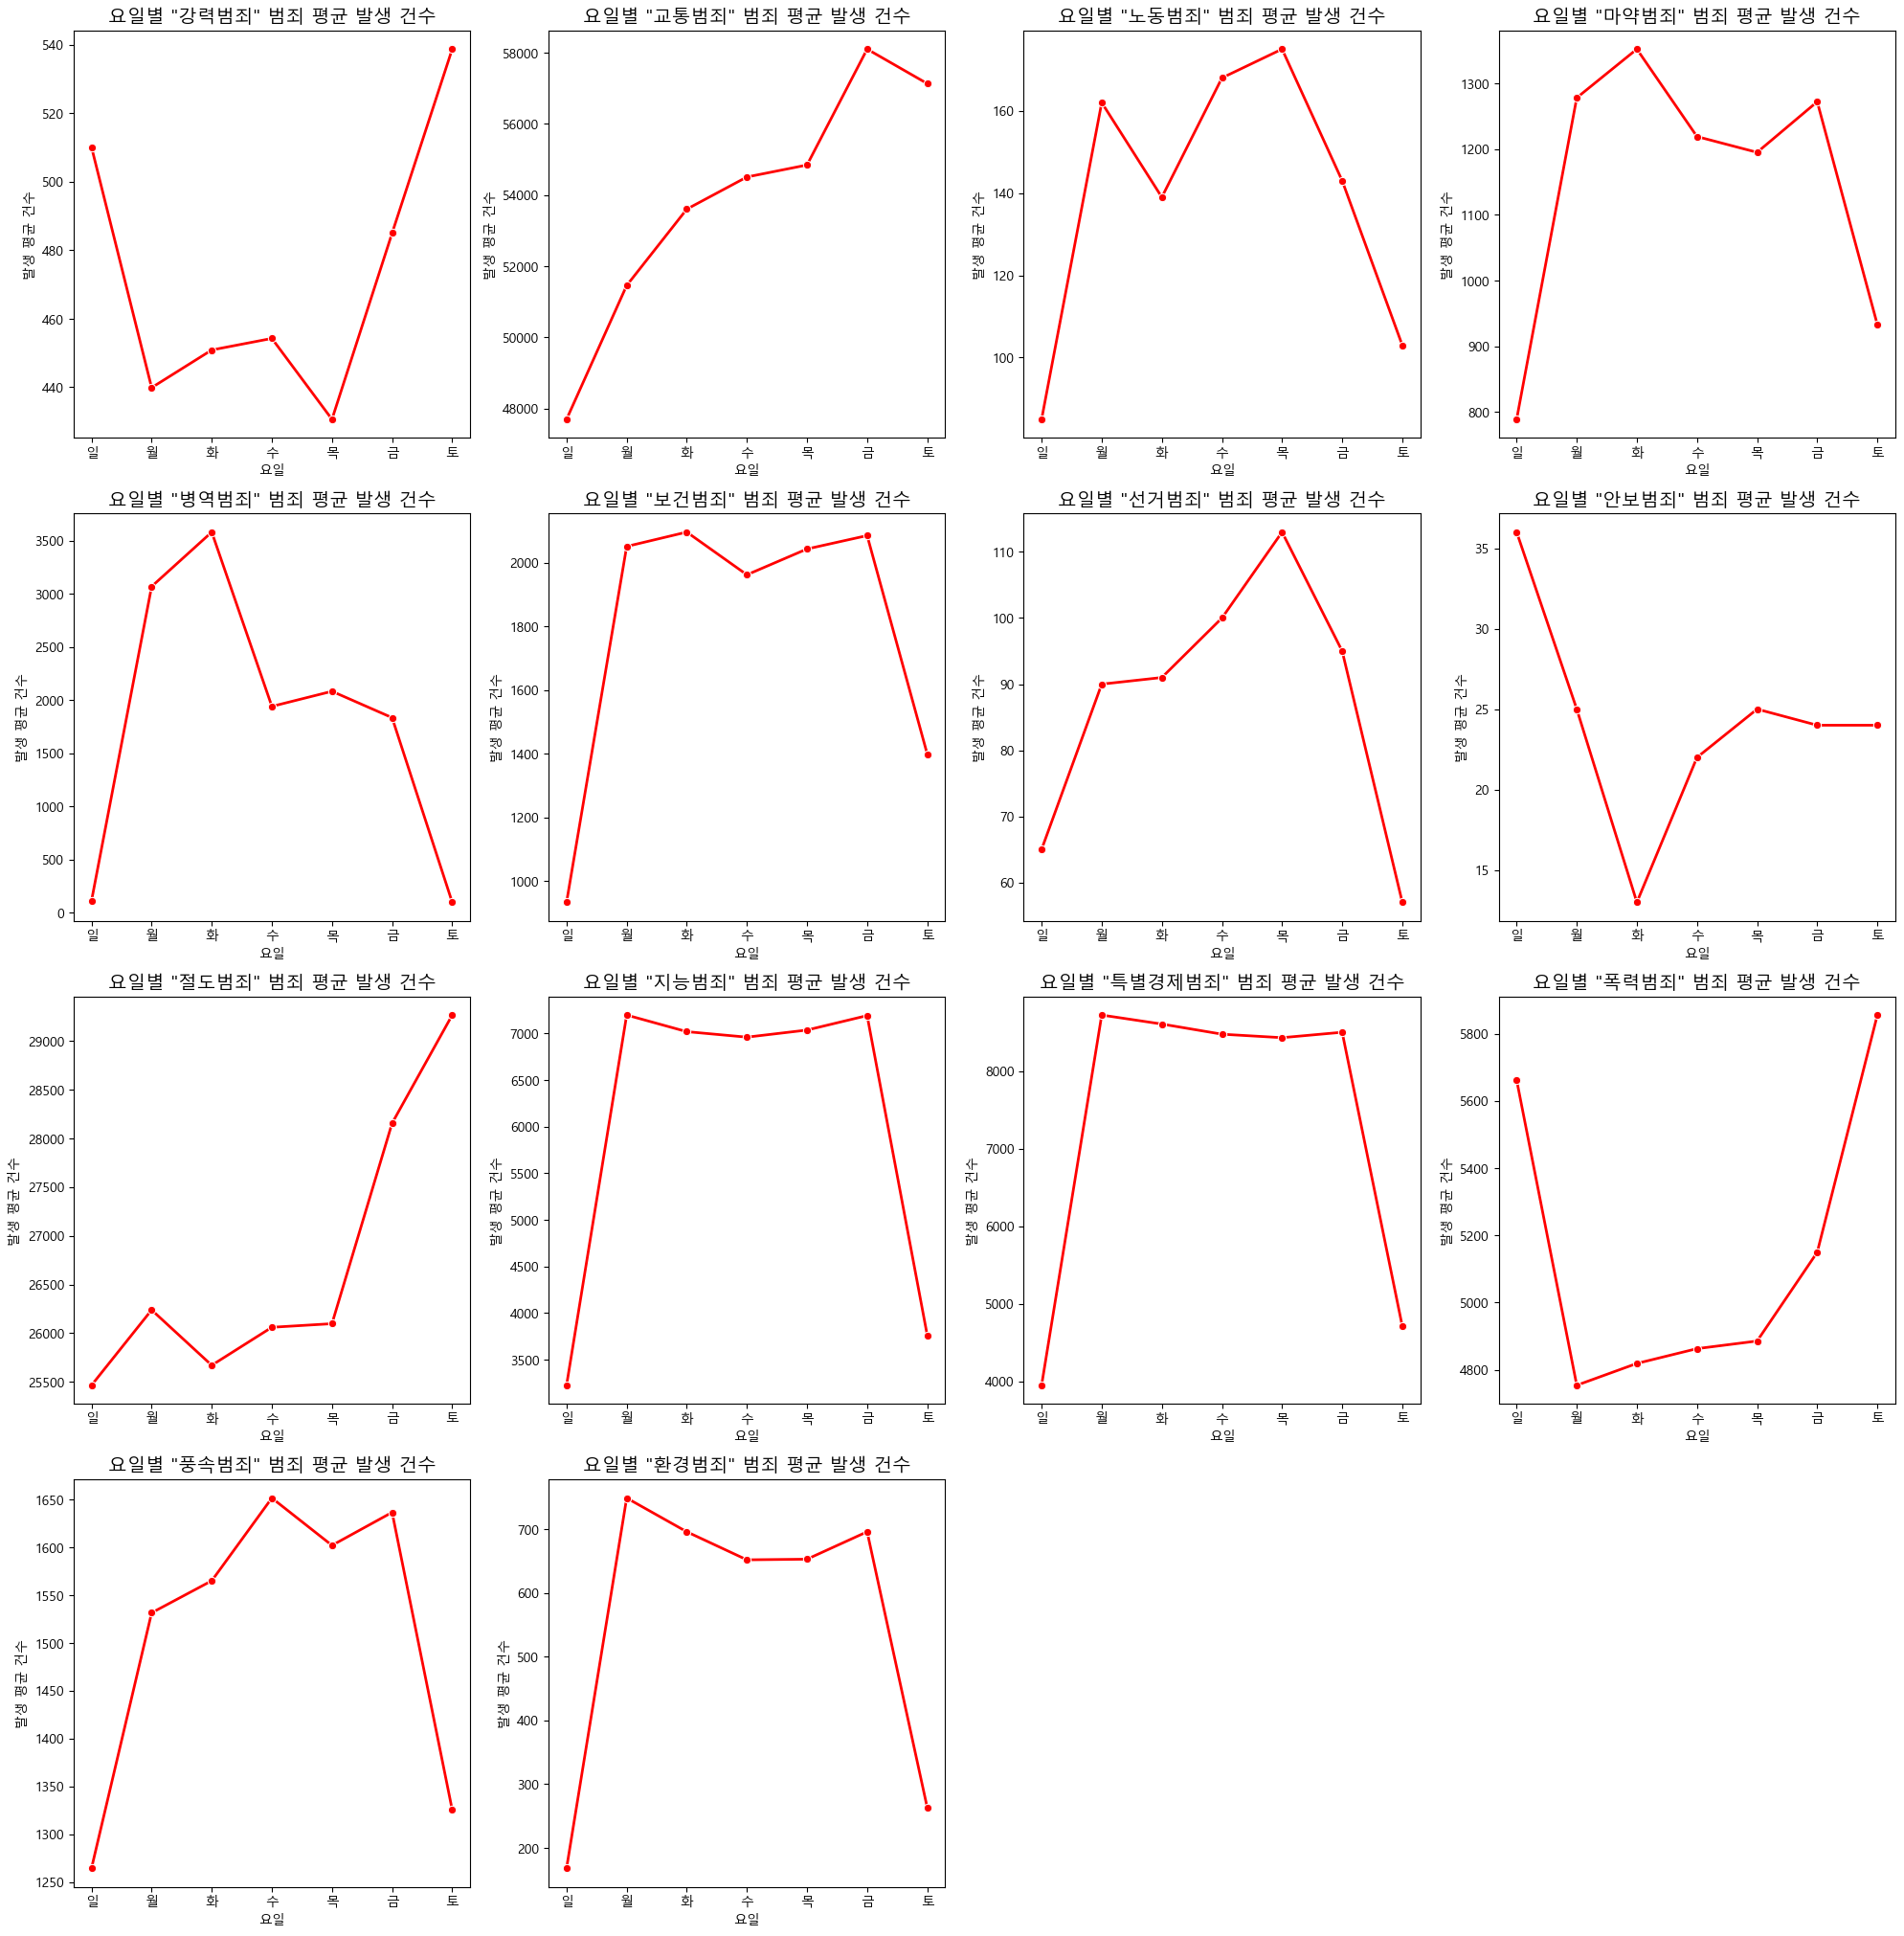

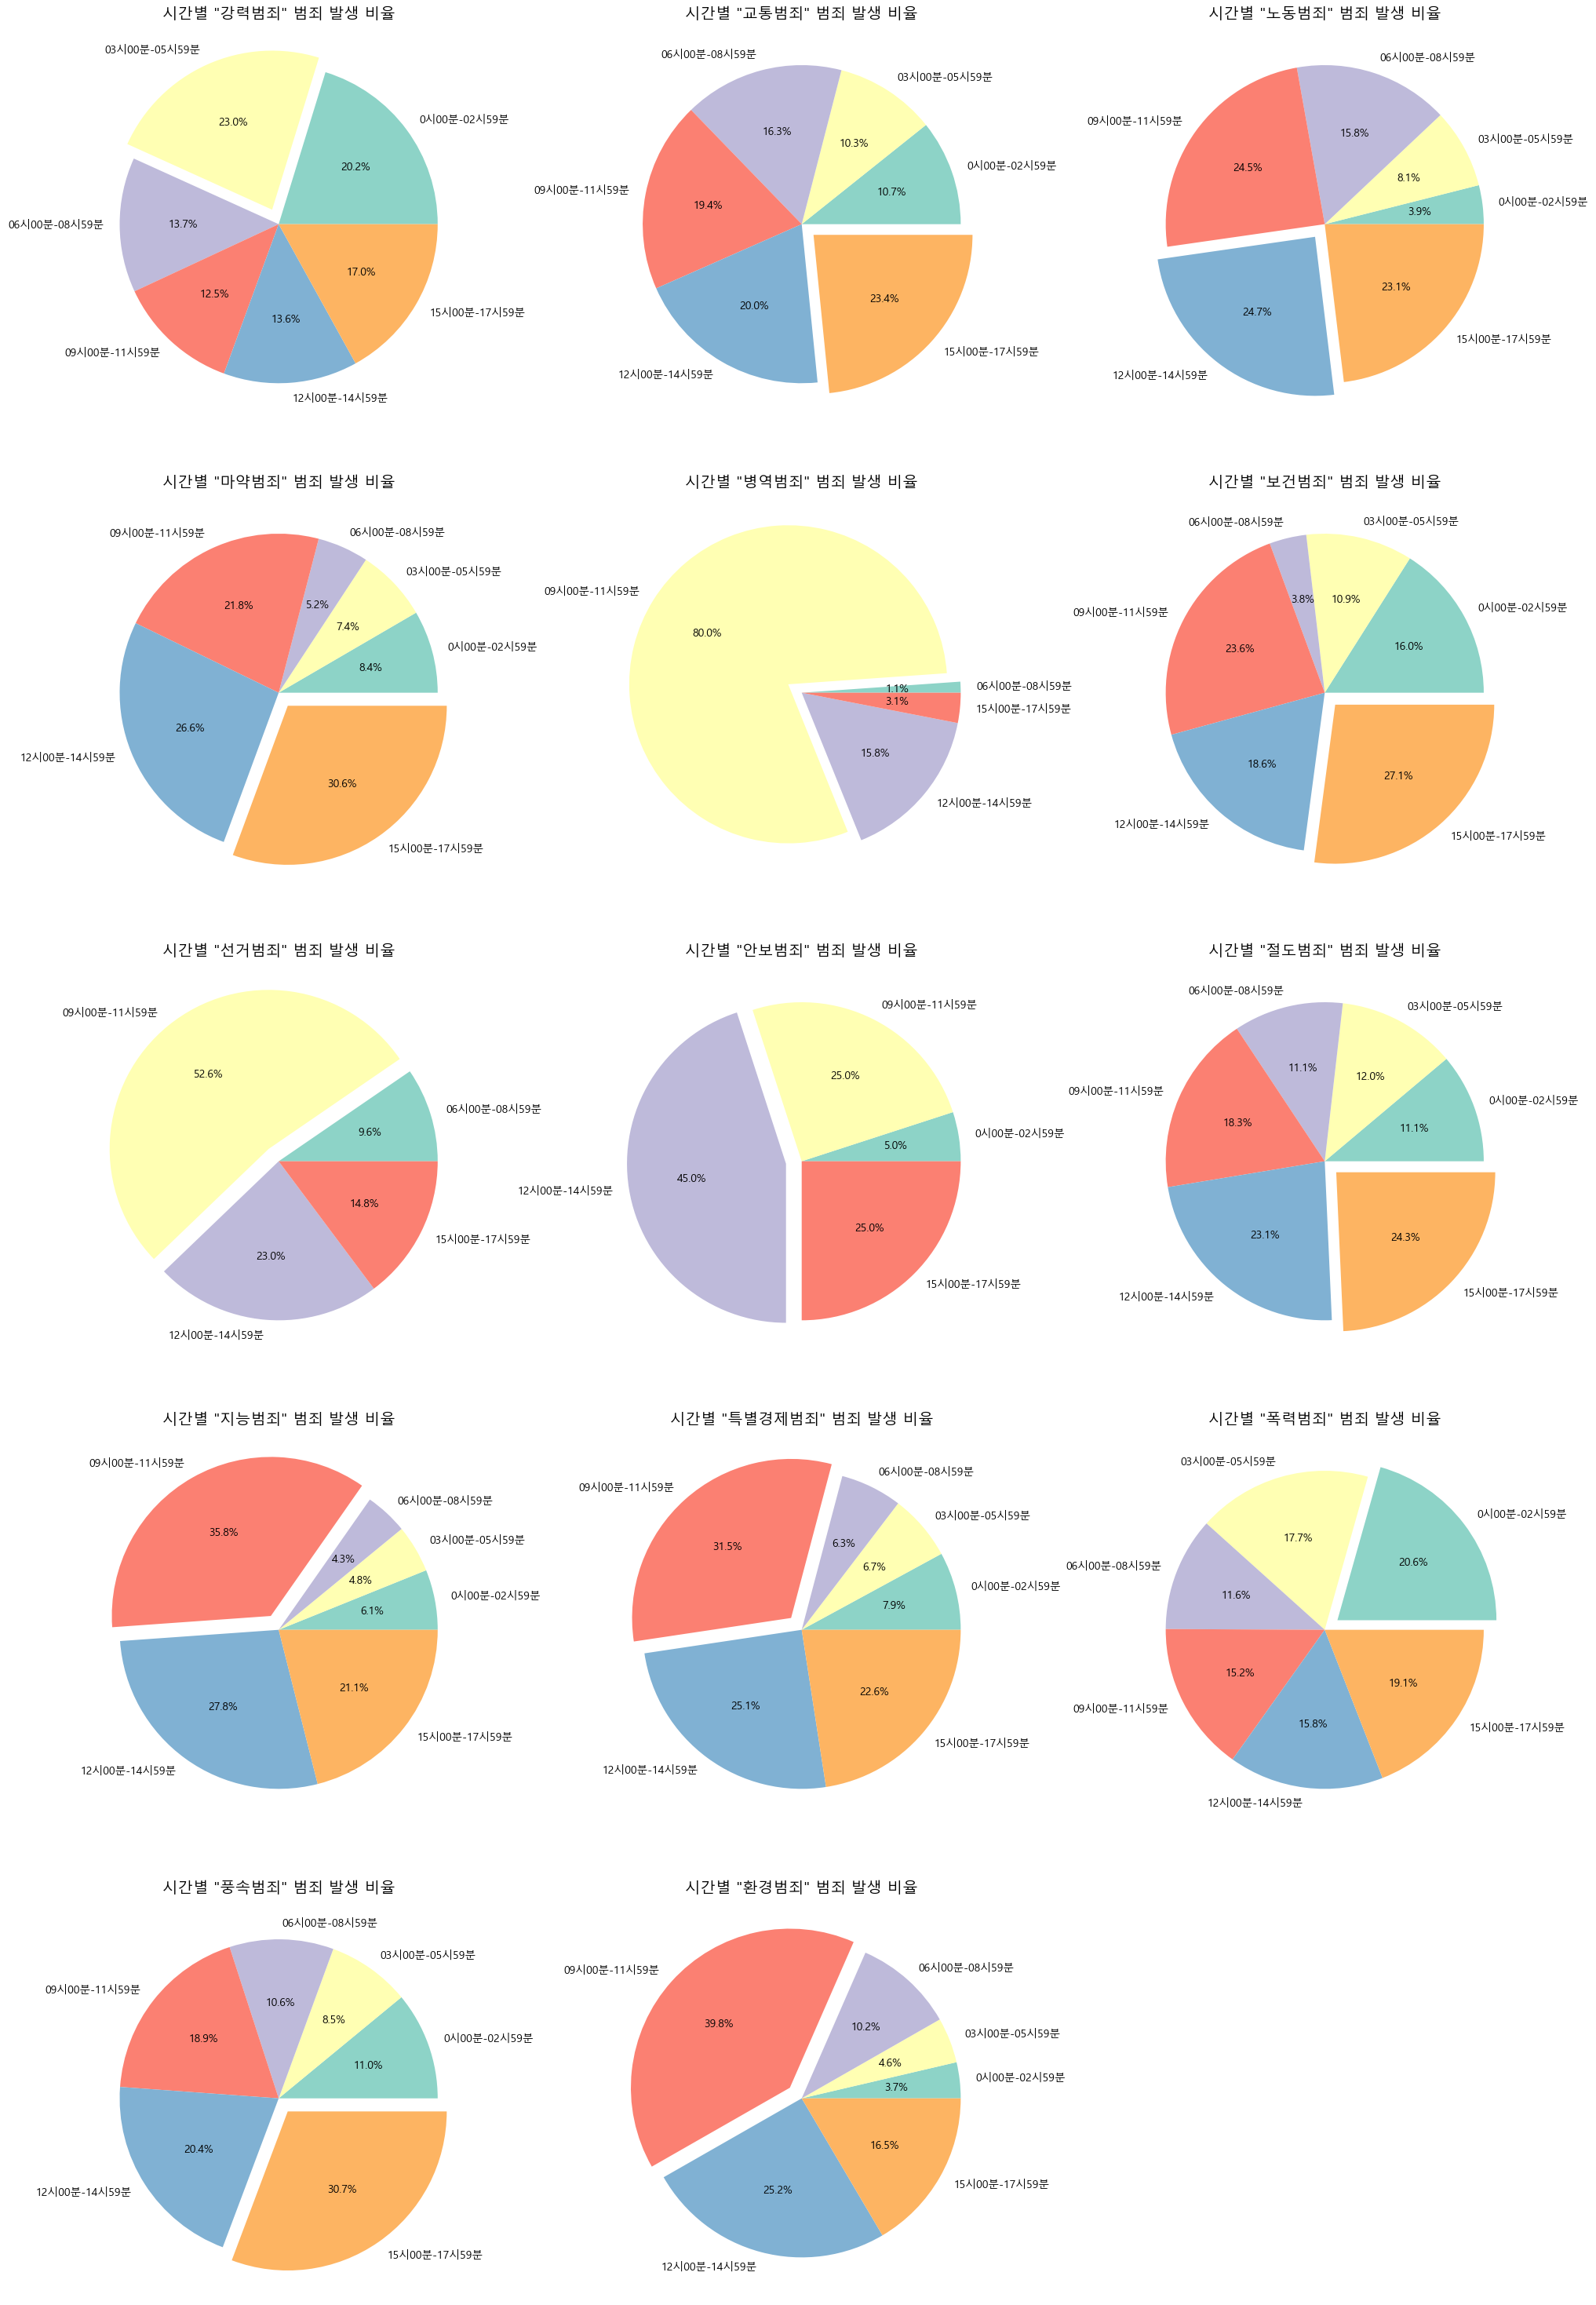

C:\Users\yun\AppData\Local\Temp\ipykernel_25320\2710710581.py:104: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:salmon'` for the same effect.

  barplotTime = sns.barplot(x='범죄대분류', y='발생 건수', hue='구분', data=highestTimeDf, color='salmon', alpha=0.7)


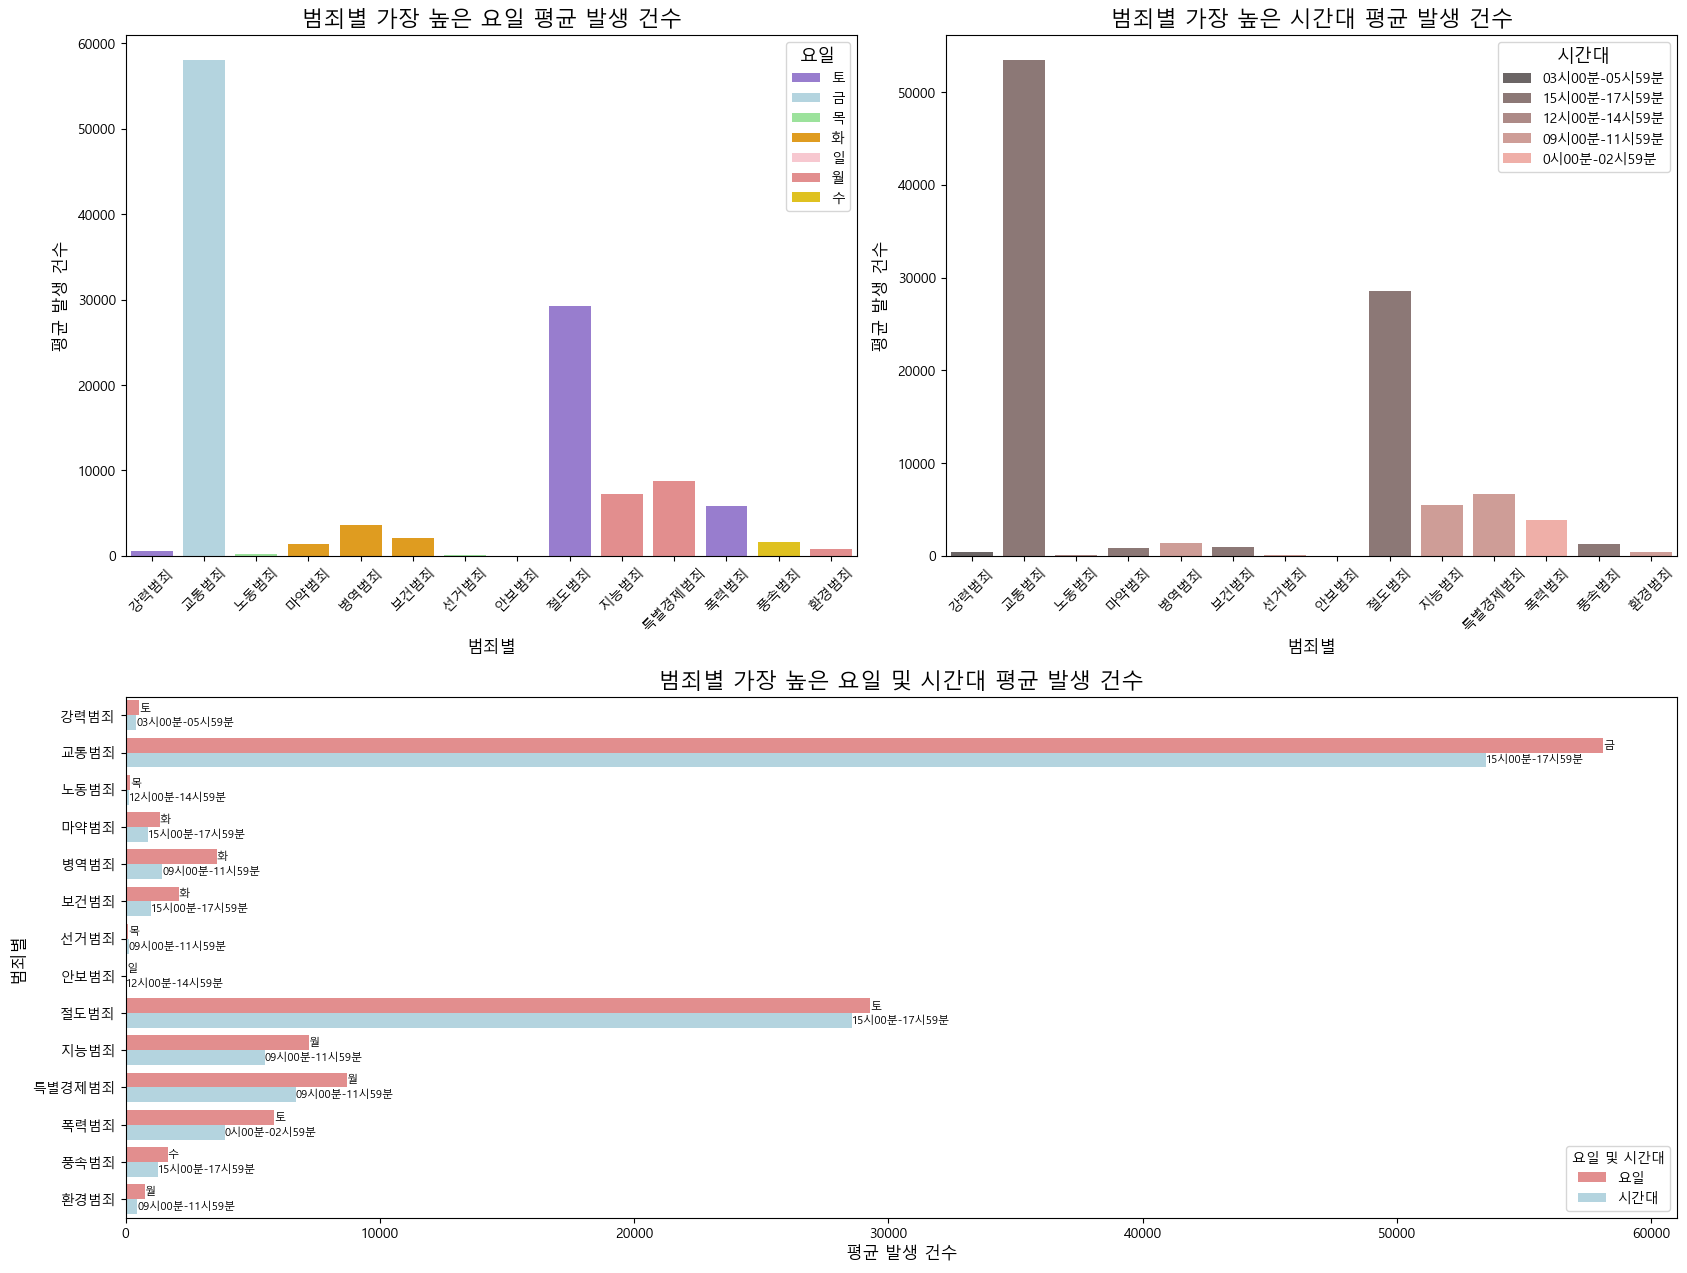

In [258]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

plt.rc('font', family='Malgun Gothic')

file_path = 'data/경찰청_범죄 발생 시간대 및 요일_20191231.csv'

day = pd.read_csv(file_path, engine='python')


mainCategory = day[day['범죄대분류'] != '기타범죄'].groupby(['범죄대분류'])

crimeTime = []
crimeWeek = []
titleList = []

for name, group in mainCategory:
    crimeTime.append(group.iloc[:, 2:8])
    crimeWeek.append(group.iloc[:, 11:])
    titleList.append(name[0])

#print(crimeWeek)

highestDay = []
highestTime = []

#가장 높은 발생 건수
for crimeData in crimeWeek:
    maxDay = crimeData.mean().idxmax()
    maxDayCount = crimeData.mean().max()
    highestDay.append((maxDay, maxDayCount))

for crimeData in crimeTime:
    maxTime = crimeData.mean().idxmax()
    maxTimeCount = crimeData.mean().max()
    highestTime.append((maxTime, maxTimeCount))

highestDayDf = pd.DataFrame(highestDay, columns=['구분', '발생 건수'])
highestDayDf['범죄대분류'] = titleList
highestDayDf['타입'] = '요일'

highestTimeDf = pd.DataFrame(highestTime, columns=['구분', '발생 건수'])
highestTimeDf['범죄대분류'] = titleList
highestTimeDf['타입'] = '시간대'

#print(highestDay)
#print(highestTime)

#선
plt.figure(figsize=(20, 30))

for i, (crimeData, title) in enumerate(zip(crimeWeek, titleList), 1):
    plt.subplot(6, 4, i)
    sns.lineplot(data=crimeData.mean(), marker='o', linewidth=2, color='r')
    plt.title(f'요일별 "{title}" 범죄 평균 발생 건수', fontsize=14)
    plt.xlabel('요일')
    plt.ylabel('발생 평균 건수')

plt.tight_layout()
plt.show()

#원
plt.figure(figsize=(20, 30))

for i, (crimeData, title) in enumerate(zip(crimeTime, titleList), 1):
    plt.subplot(5, 3, i)
    
    data = crimeData.sum() / crimeData.sum().sum() * 100 #비율 %

    data = data[data >= 1.0]    #1.0 이하는 제외

    explode = [0] * len(data)
    maxIndex = data.idxmax()  #가장 큰 값의 열
    explode[data.index.get_loc(maxIndex)] = 0.1  #가장 큰 값의 웨지만 튀어나오도록 설정

    plt.pie(data, labels=data.index, autopct='%1.1f%%', colors=plt.cm.Set3.colors, explode=explode)
    plt.title(f'시간별 "{title}" 범죄 발생 비율', fontsize=14)
    
plt.tight_layout()
plt.show()

combinedDf = pd.concat([highestDayDf, highestTimeDf], ignore_index=True)
#print(highestDayDf, highestTimeDf)
#print(combinedDf)

dayPalette = {
    '월': 'lightcoral', '화': 'orange', '수': 'gold',
    '목': 'lightgreen', '금': 'lightblue', '토': 'mediumpurple', '일': 'pink'
}

plt.figure(figsize=(17, 19))

plt.subplot(321)
barplotDay = sns.barplot(x='범죄대분류', y='발생 건수', hue='구분', data=highestDayDf, palette=dayPalette)
plt.title('범죄별 가장 높은 요일 평균 발생 건수', fontsize=16)
plt.xlabel('범죄별', fontsize=12)
plt.ylabel('평균 발생 건수', fontsize=12)
plt.xticks(rotation=45)
handlesDay, labelsDay = barplotDay.get_legend_handles_labels()
legendDay = plt.legend(handles=handlesDay, labels=[f'{label}' for label in labelsDay], title='요일', title_fontsize='13', loc='upper right')

plt.subplot(322)
barplotTime = sns.barplot(x='범죄대분류', y='발생 건수', hue='구분', data=highestTimeDf, color='salmon', alpha=0.7)
plt.title('범죄별 가장 높은 시간대 평균 발생 건수', fontsize=16)
plt.xlabel('범죄별', fontsize=12)
plt.ylabel('평균 발생 건수', fontsize=12)
plt.xticks(rotation=45)
handlesTime, labelsTime = barplotTime.get_legend_handles_labels()
legendTime = plt.legend(handles=handlesTime, labels=[f'{label}' for label in labelsTime], title='시간대', title_fontsize='13', loc='upper right')

plt.subplot(312)
barplot = sns.barplot(x='발생 건수', y='범죄대분류', hue='타입', data=combinedDf, palette={'요일': 'lightcoral', '시간대': 'lightblue'})
plt.title('범죄별 가장 높은 요일 및 시간대 평균 발생 건수', fontsize=16)
plt.xlabel('평균 발생 건수', fontsize=12)
plt.ylabel('범죄별', fontsize=12)
plt.legend(title='요일 및 시간대')

for i, p in enumerate(barplot.patches):
    x = p.get_width()
    y = p.get_y() + p.get_height() / 2
    
    if i < len(titleList):
        barType = '요일'
        category_idx = i
    else:
        barType = '시간대'
        category_idx = i - len(titleList)
    
    if barType == '요일' and category_idx < len(highestDay):
        text = highestDay[category_idx][0]
    elif barType == '시간대' and category_idx < len(highestTime):
        text = highestTime[category_idx][0]
    else:
        text = ''
    
    # 텍스트를 오른쪽 정렬하여 표시
    barplot.text(x, y, f'{text}', ha='left', va='center', fontsize=8, color='black')

plt.tight_layout()
plt.show()

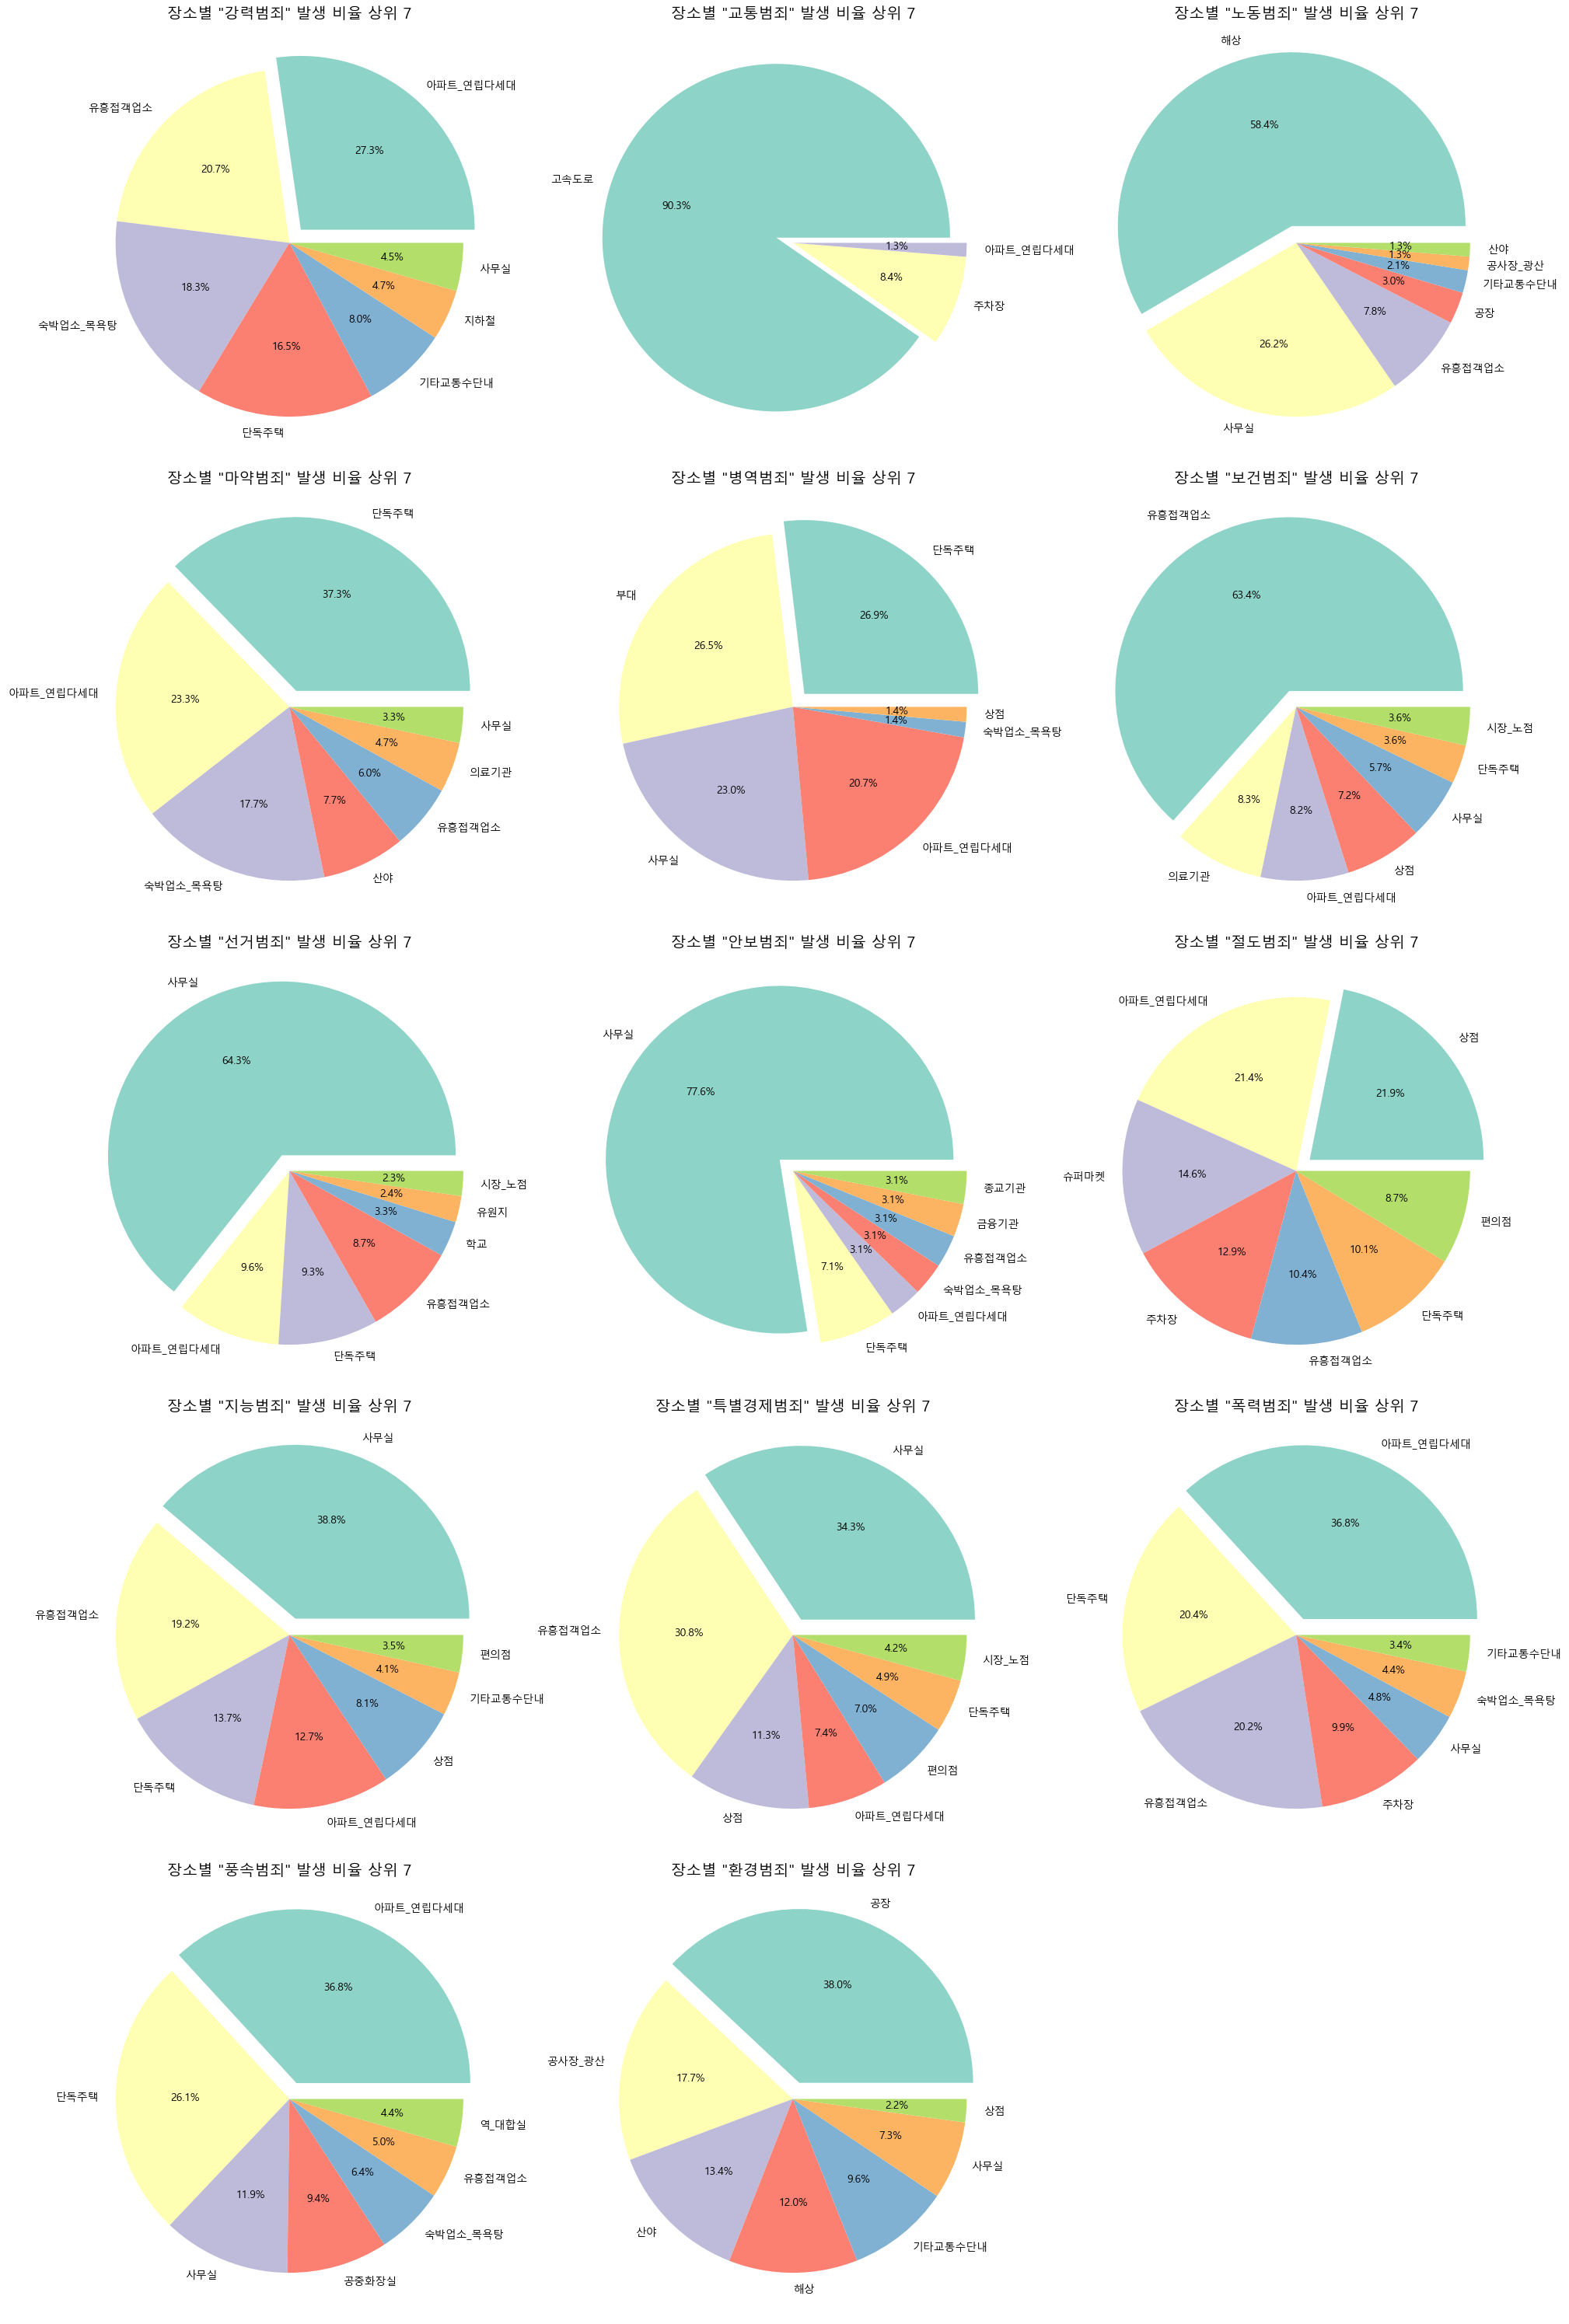

C:\Users\yun\AppData\Local\Temp\ipykernel_25320\2997297378.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data.values, palette='Set3')
C:\Users\yun\AppData\Local\Temp\ipykernel_25320\2997297378.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data.values, palette='Set3')
C:\Users\yun\AppData\Local\Temp\ipykernel_25320\2997297378.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data.values, palette='Set3')
C:\Users\yun\AppData\Local\Temp\ipykernel_25320\2997297378.py:53: FutureWarn

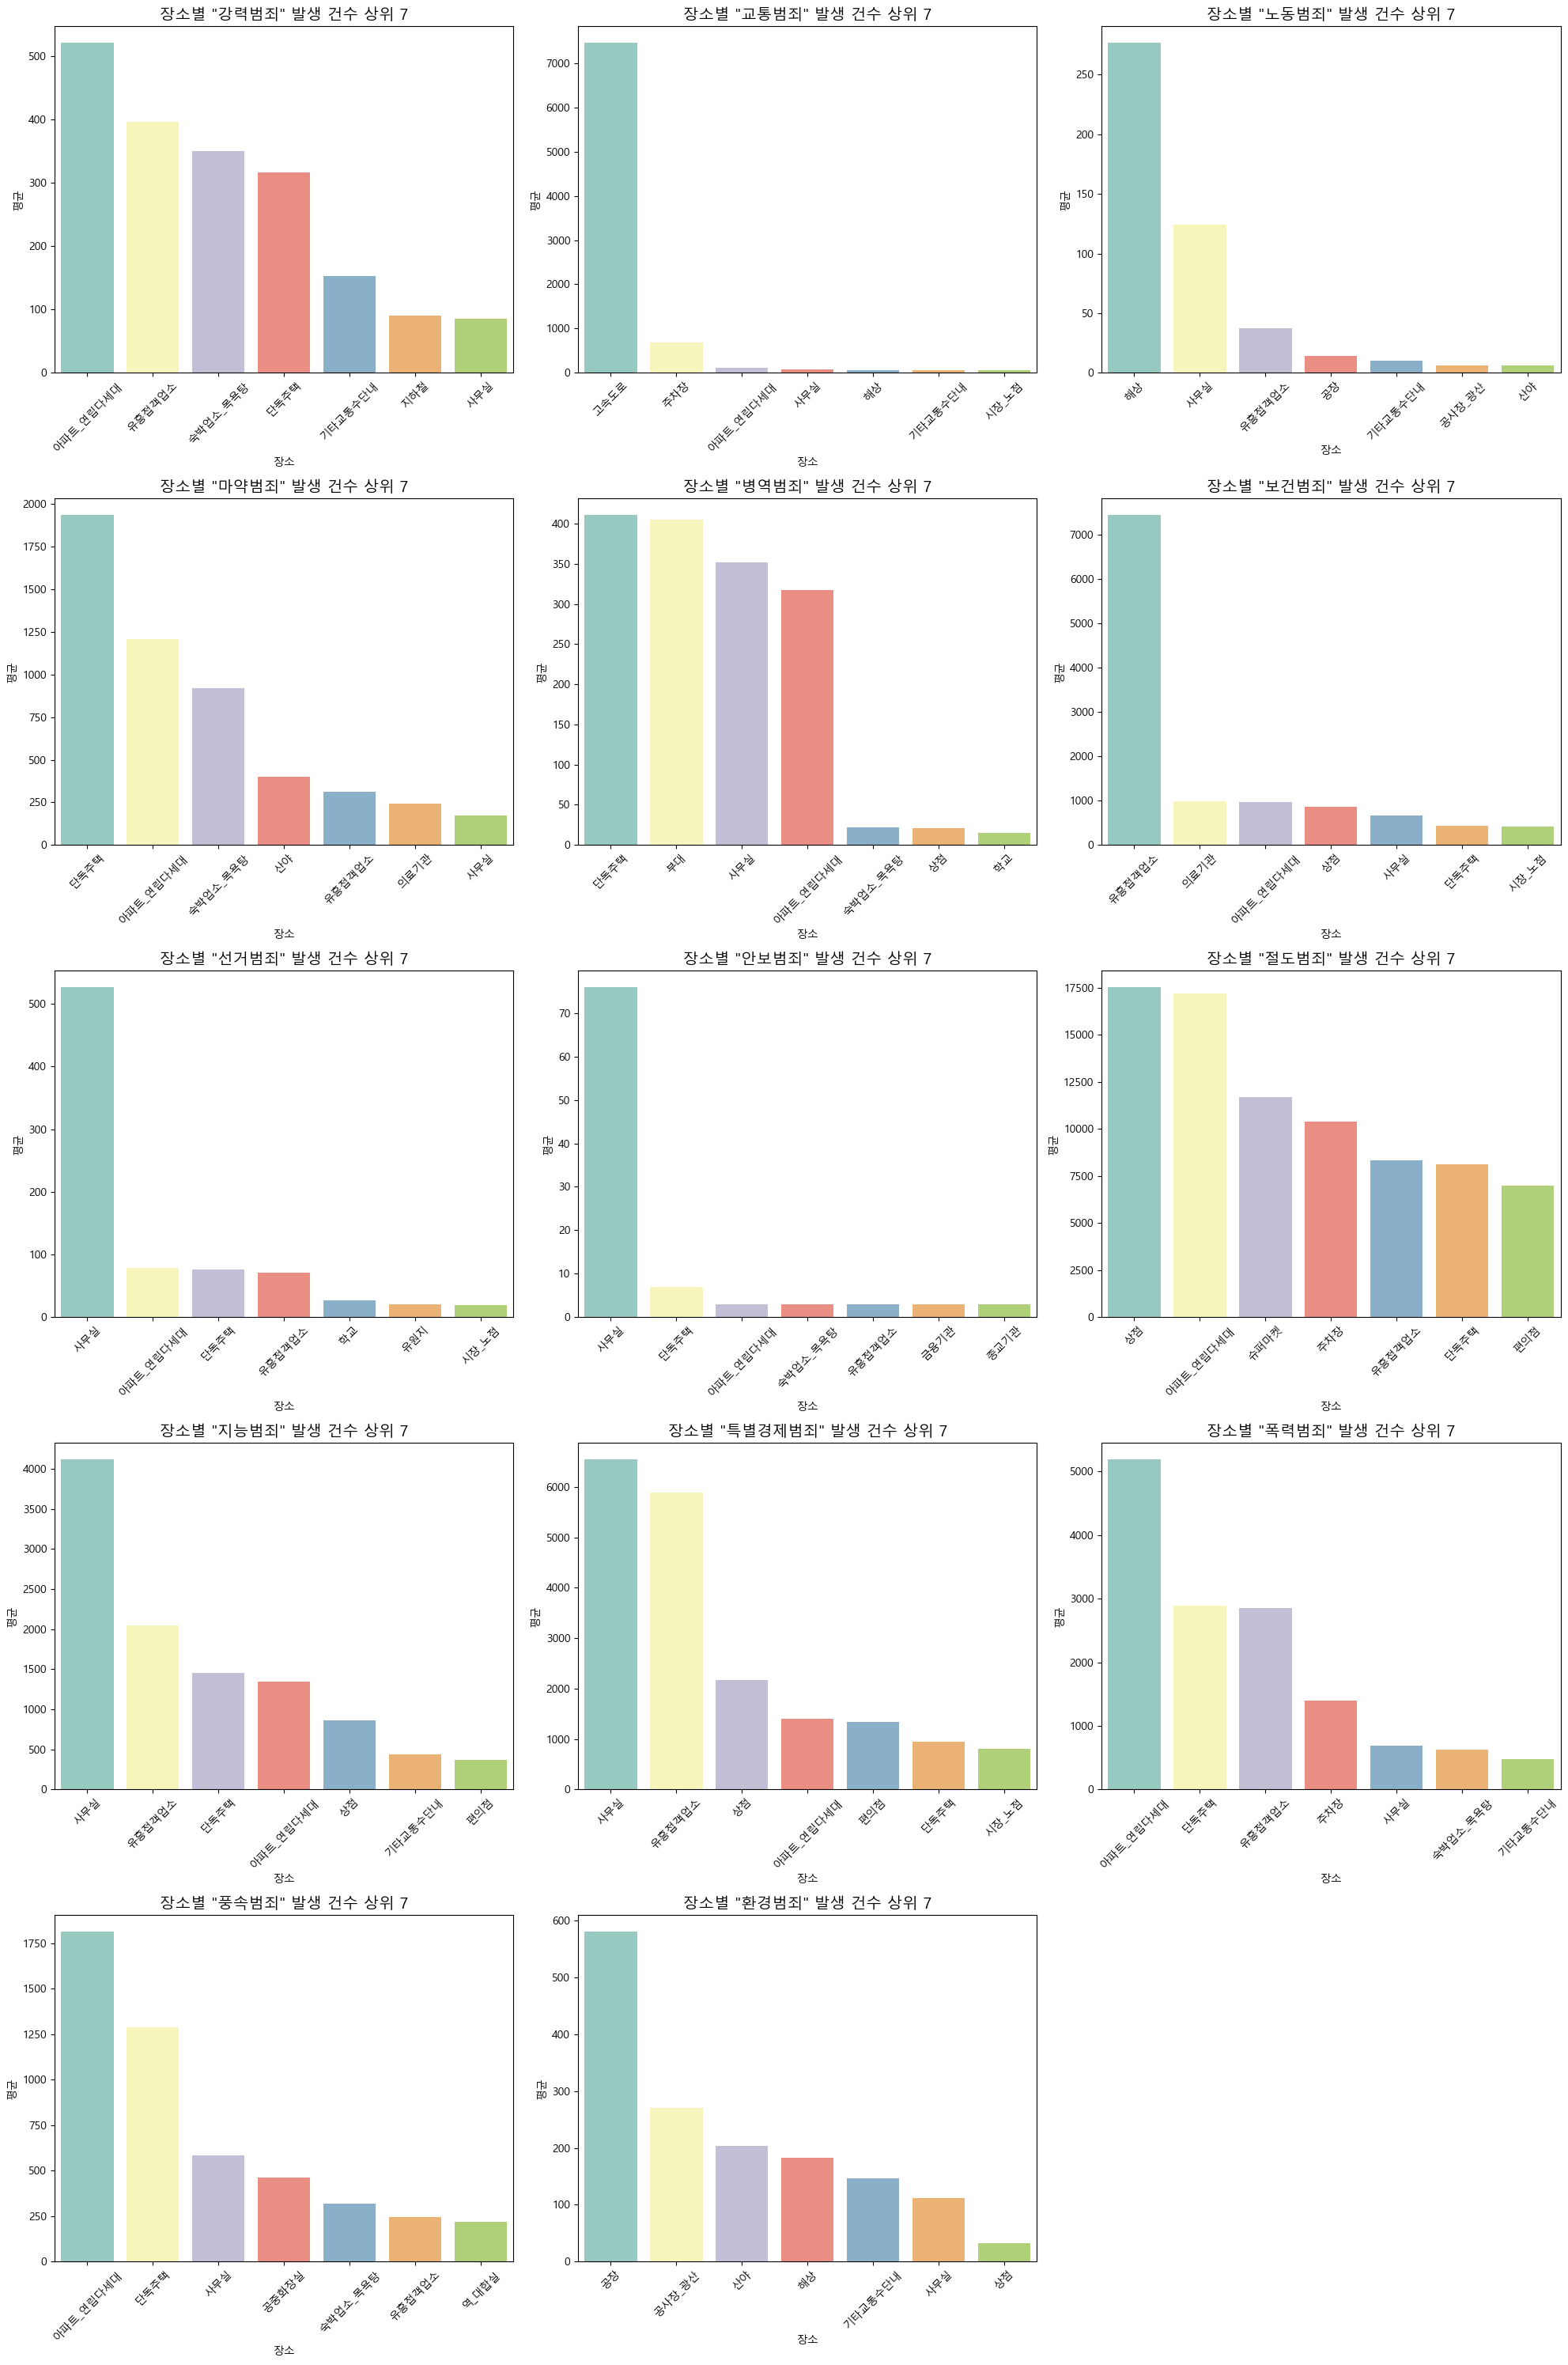

In [259]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

plt.rc('font', family='Malgun Gothic')

file_path = 'data/경찰청_범죄 발생 장소별 통계_20221231.csv'

location = pd.read_csv(file_path, engine='python')

mainCategory = location[location['범죄대분류'] != '기타범죄'].groupby(['범죄대분류'])

crimeTypeList = []
titleList = []

#기타, 노상 제외
for name, group in mainCategory:
    crime = pd.DataFrame(group.iloc[:, 2:])
    if '기타' in crime.columns and '노상' in crime.columns:
        crime = crime.drop(columns=['기타', '노상'])
    crimeTypeList.append(crime)
    titleList.append(name[0])

#원
plt.figure(figsize=(20, 30))

top = 7

for i, (crimeData, title) in enumerate(zip(crimeTypeList, titleList), 1):
    plt.subplot(5, 3, i)
    
    data = crimeData.sum().nlargest(top) / crimeData.sum().sum() * 100    #비율 %

    data = data[data >= 1.0]    #1.0 이하는 제외

    explode = [0] * len(data)
    maxIndex = data.idxmax()  #가장 큰 값의 열
    explode[data.index.get_loc(maxIndex)] = 0.1  #가장 큰 값의 웨지만 튀어나오도록 설정

    plt.pie(data, labels=data.index, autopct='%1.1f%%', colors=plt.cm.Set3.colors, explode=explode)
    plt.title(f'장소별 "{title}" 발생 비율 상위 {top}', fontsize=14)

plt.tight_layout()
plt.show()

#막대
plt.figure(figsize=(20, 30))

for i, (crimeData, title) in enumerate(zip(crimeTypeList, titleList), 1):
    plt.subplot(5, 3, i)
    
    data = crimeData.mean().nlargest(top)
    sns.barplot(x=data.index, y=data.values, palette='Set3')
    plt.title(f'장소별 "{title}" 발생 건수 상위 {top}', fontsize=14)
    plt.xlabel('장소')
    plt.ylabel('평균')
    plt.xticks(rotation=45)
    
plt.tight_layout()
plt.show()


C:\Users\yun\AppData\Local\Temp\ipykernel_25320\2981242917.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data.values, palette='Set3')
C:\Users\yun\AppData\Local\Temp\ipykernel_25320\2981242917.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data.values, palette='Set3')
C:\Users\yun\AppData\Local\Temp\ipykernel_25320\2981242917.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data.values, palette='Set3')
C:\Users\yun\AppData\Local\Temp\ipykernel_25320\2981242917.py:64: FutureWarn

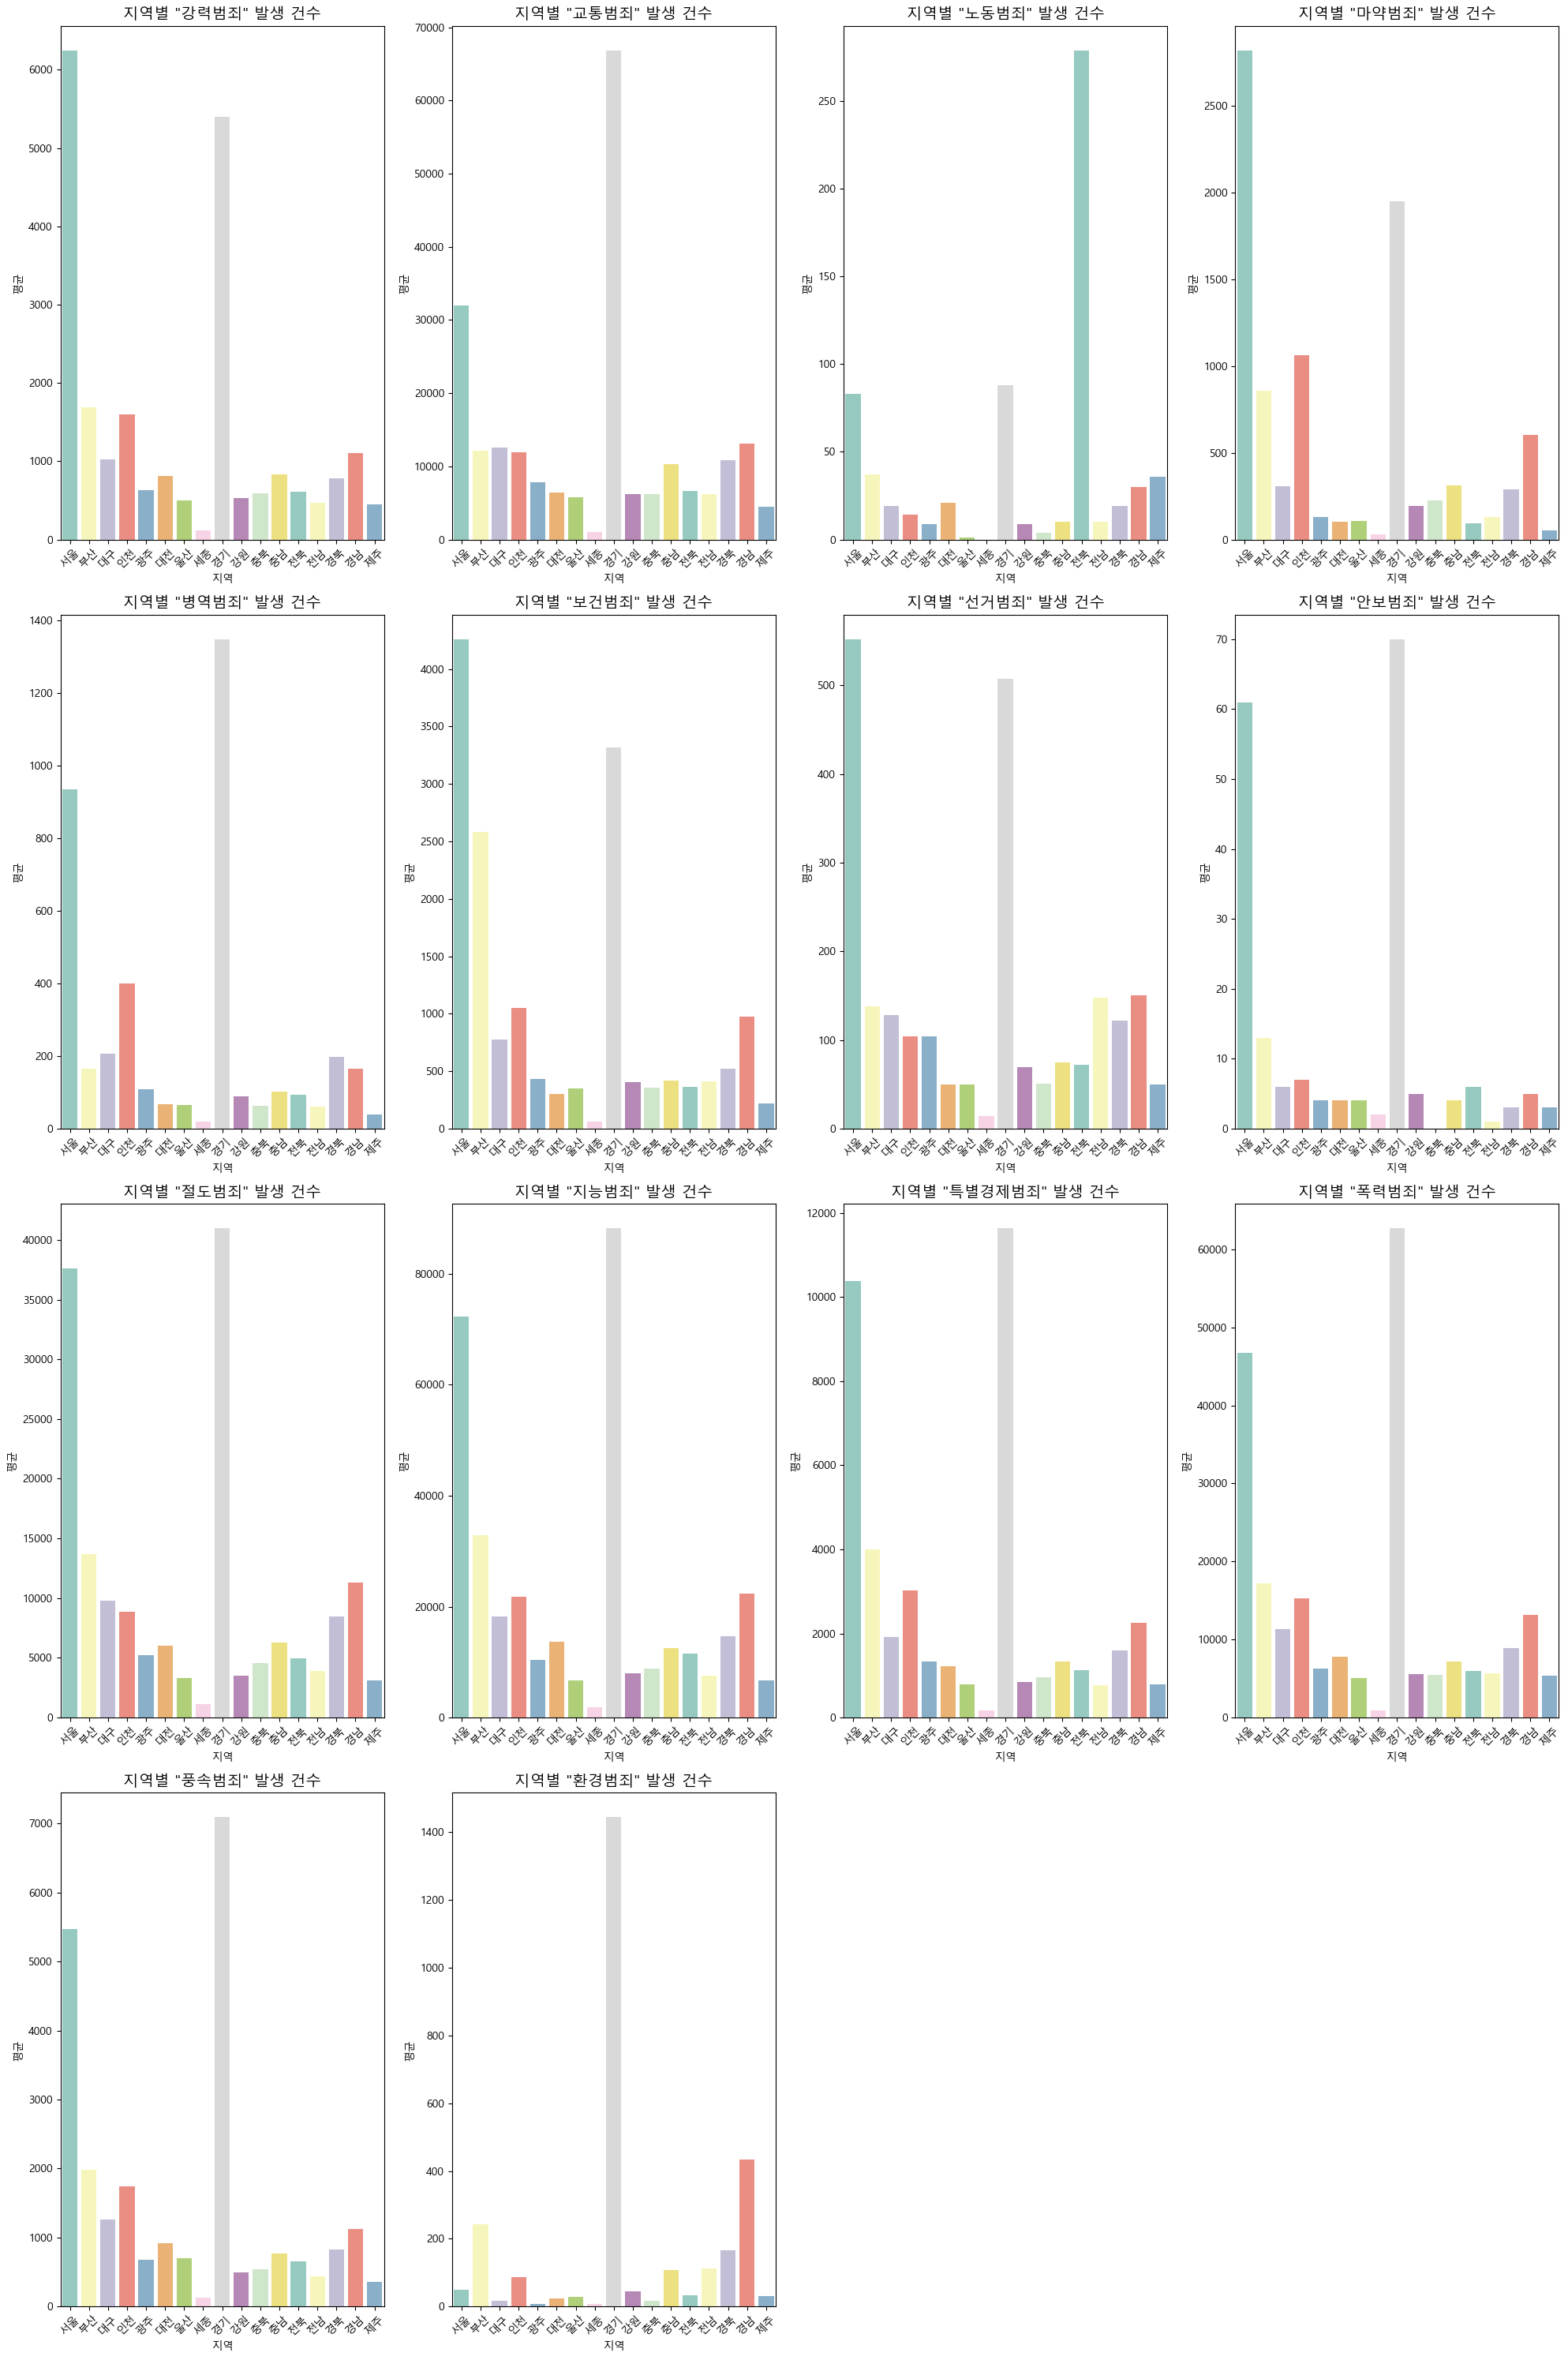

In [262]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

plt.rc('font', family='Malgun Gothic')

file_path = 'data/경찰청_범죄 발생 지역별 통계_20221231.csv'    #22년 통계

region = pd.read_csv(file_path, engine='python')

mainCategory = region[region['범죄대분류'] != '기타범죄'].groupby(['범죄대분류'])

#mainCategory.get_group('강력범죄')

crimeTypeList = []  #지역별 데이터
titleList = []  #범죄 유형

for name, group in mainCategory:
    crime = pd.DataFrame(group.iloc[:, 2:].sum()).T
    if '기타도시' in crime.columns and '도시이외' in crime.columns:
        crime = crime.drop(columns=['기타도시', '도시이외'])
    crimeTypeList.append(crime)
    titleList.append(name[0])
    
#print(crimeTypeList)
#print(titleList)

def processCrimeData(type):
    gyeonggi = [col for col in type.columns if col.startswith('경기')]
    gangwon = [col for col in type.columns if col.startswith('강원')]
    chungbuk = [col for col in type.columns if col.startswith('충북')]
    chungnam = [col for col in type.columns if col.startswith('충남')]
    jeonbuk = [col for col in type.columns if col.startswith('전북')]
    jeonnam = [col for col in type.columns if col.startswith('전남')]
    gyeongbuk = [col for col in type.columns if col.startswith('경북')]
    gyeongnam = [col for col in type.columns if col.startswith('경남')]
    jeju = [col for col in type.columns if col.startswith('제주')]

    type['경기'] = type[gyeonggi].sum(axis=1)
    type['강원'] = type[gangwon].sum(axis=1)
    type['충북'] = type[chungbuk].sum(axis=1)
    type['충남'] = type[chungnam].sum(axis=1)
    type['전북'] = type[jeonbuk].sum(axis=1)
    type['전남'] = type[jeonnam].sum(axis=1)
    type['경북'] = type[gyeongbuk].sum(axis=1)
    type['경남'] = type[gyeongnam].sum(axis=1)
    type['제주'] = type[jeju].sum(axis=1)

    type.drop(columns=(gyeonggi + gangwon + chungbuk + chungnam + jeonbuk + jeonnam + gyeongbuk + gyeongnam + jeju), inplace=True) #열 제거
    #print(gyeonggi)
    #print(type['경기'])
    return type

for i in range(len(crimeTypeList)):
    crimeTypeList[i] = processCrimeData(crimeTypeList[i])

#막대
plt.figure(figsize=(20, 30))

for i, (crimeData, title) in enumerate(zip(crimeTypeList, titleList), 1):
    plt.subplot(4, 4, i)
    
    data = crimeData.mean()
    sns.barplot(x=data.index, y=data.values, palette='Set3')
    plt.title(f'지역별 "{title}" 발생 건수', fontsize=14)
    plt.xlabel('지역')
    plt.ylabel('평균')
    plt.xticks(rotation=45)


plt.tight_layout()
plt.show()